In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# importing datasets
contact=pd.read_csv("C:\\Users\\mosto\\REPOSITORY\\HIRE HEORS USA\\SalesForce_Contact.csv",encoding='latin1')
hire=pd.read_csv("C:\\Users\\mosto\\REPOSITORY\\HIRE HEORS USA\\SalesForce_Hire_Information__c.csv",encoding='latin1')
activity=pd.read_csv("C:\\Users\\mosto\\REPOSITORY\\HIRE HEORS USA\\SalesForce_2018Activities.csv",encoding='latin1')
cases=pd.read_csv("C:\\Users\\mosto\\REPOSITORY\\HIRE HEORS USA\\SalesForce_Case.csv",encoding='latin1')
contact.head(5)

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,19,25,27,32,33,34,35,36,37,38,41,42,45,46,52,53,57,58,59,60,61,62,63,66,67,70,71,73,74,75,76,78,80,82,83,88,89,90,93,96,108,109,114,115,116,117,118,120,122,124,127,129,130,133,136,137,140,141,144,146,150,154,155,158,159,162,163,164,170,171,172,173,184,186,188,194,195,200,204,208,212,220,222,227,231,233,234,235,237,238,240,243,244,247,254,260,261,262,270,273,274,275,280,284,285,288,291,293,294,295,297,299,301,304,307,309,310,313,314,315,316,317,318,319,322,324,325,329,332,338,339,340,342,344,345,347,357,359,360,361,362,363,370,371,372,373,374,375,377,378,380,382,383,385,386,387,388) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types.Specify dtype 

,Id,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,LeadSource,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,...,Send_Green_Survey__c,Professional_Certification__c,TS_Referral_Requested_By__c,RealZip__RealZip__c,Discharge_Type__c,Discharge_Disposition__c,Date_Turned_Black__c,Litmos__Litmos_Login_Access__c,Litmos__Total_Sum_Percentages__c,Willing_to_Relocate_to_High_Risk_Area__c
0,0030z00002PrWd6AAF,0015000000KUwKAAA1,01238000000UVfW,CA,95821,United States,NaN,00550000000ztRtAAI,0,0,...,0,NaN,NaN,a5D38000000I4fJEAS,NaN,NaN,NaN,No,NaN,0.0
1,0030z00002PrWdBAAV,0015000000KUwKAAA1,01238000000UVfW,VA,NaN,United States,NaN,00538000005ZA5kAAG,0,0,...,0,NaN,NaN,a5D38000000I8CkEAK,NaN,NaN,NaN,No,NaN,0.0
2,0030z00002PrWflAAF,0015000000KUwKAAA1,01238000000UVfW,GA,31905,United States,NaN,005380000063Mg0AAE,0,0,...,0,NaN,NaN,a5D38000000I8xAEAS,Honorable Discharge,NaN,NaN,No,NaN,0.0
3,0030z00002PrWgPAAV,0015000000KUwKAAA1,01238000000UVfW,MI,48628,United States,NaN,00550000001zVqjAAE,0,0,...,0,NaN,NaN,a5D38000000I9lSEAS,NaN,NaN,NaN,No,NaN,0.0
4,0030z00002PrWi1AAF,0015000000KUwKAAA1,01238000000UVfW,ID,83815,United States,NaN,00538000005F2ADAA0,0,0,...,0,NaN,NaN,a5D38000000I35QEAS,NaN,NaN,8/9/2018 0:00,No,NaN,0.0


In [4]:
# Joining Contact & Hire Datasets

join1 = pd.merge(contact, hire, how='left', left_on='Id', right_on='Client_Name__c')
join1.head(5)

,Id_x,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,LeadSource,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,...,X7_Day_Review__c,Months_Unemployed__c_y,Revised_Resume_Used_to_Apply_for_Job__c_y,Hired_but_still_active_and_looking__c_y,Date_Submitted_For_Hire__c,Hire_Confirmed_By__c,Area_Manager_Approved__c,PIM_Approved__c,Ops_Review_Date__c,Multiple_Hire__c
0,0030z00002PrWd6AAF,0015000000KUwKAAA1,01238000000UVfW,CA,95821,United States,NaN,00550000000ztRtAAI,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0030z00002PrWdBAAV,0015000000KUwKAAA1,01238000000UVfW,VA,NaN,United States,NaN,00538000005ZA5kAAG,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0030z00002PrWflAAF,0015000000KUwKAAA1,01238000000UVfW,GA,31905,United States,NaN,005380000063Mg0AAE,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0030z00002PrWgPAAV,0015000000KUwKAAA1,01238000000UVfW,MI,48628,United States,NaN,00550000001zVqjAAE,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0030z00002PrWi1AAF,0015000000KUwKAAA1,01238000000UVfW,ID,83815,United States,NaN,00538000005F2ADAA0,0,0,...,NaN,NaN,1.0,0.0,10/22/2018 0:00,00538000005F2ADAA0,1.0,1.0,10/29/2018 0:00,0.0


In [5]:
join1.shape

(132659, 425)

In [6]:
column_list1 = ['Alumni_Survey_Completed__c', 'Anonymous_Donor__c', 'Available_For_Urgents__c', 'Bilingual__c', 'Client_Type__c', 'DD214__c', 'Desired_Earnings_Type__c',
'Desired_Geographic_Region_of_Employment__c', 'Desired_Industry_for_Employment__c', 'Desired_Job_Function__c', 'Desired_State_of_Employment__c', 'Do_Not_Notify_Client__c',
'Do_Not_Text__c', 'Documents_Received__c', 'Employment_Barriers__c', 'Enrolled_in_School__c', 'Federal_Hire__c', 'Finalized_HHUSA_revised_resume_on_file__c',
'Gender__c', 'HasOptedOutOfEmail', 'HasOptedOutOfFax', 'HHUSA_Workshop_Participant__c', 'Highest_Level_of_Education_Completed__c',
'Hired_with_EO_assistance__c', 'Interested_In_Volunteer_Opportunities__c', 'Interview_Skills__c', 'Is_vet_willing_to_go_on_camera__c',
'Job_Board_Access__c', 'Litmos__Litmos_Activated__c', 'MailingState', 'Military_Spouse_Caregiver__c', 'Min_Salary_Expectations__c',
'Multiple_HHUSA_Hire__c', 'Multiple_Hire_Review_Complete__c', 'MyTrak_Is_MyTrak_Registrant__c', 'MyTrak_Mock_Interview_Request__c',
'MyTrak_Mock_Inteview_Request_Date__c', 'Number_of_dependents__c', 'O2O_Hire__c', 'O2O_Initial_Assessment_Complete__c',
'O2O_Program_Participant__c', 'Online_Training_Participant__c', 'Original_Resume_on_File__c', 'Payment_Received__c', 'priority_veteran__c',
'Purple_Heart_Recipient__c', 'Race__c', 'Responsive__c', 'Revised_Resume_Used_to_Apply_for_Job__c', 'ringdna100__Call_Attempts__c',
'ringdna100__Email_Attempts__c', 'Salary_Expectations__c', 'Send_Retention_Survey__c', 'Service_Branch__c', 'Service_Members_Status__c',
'Status__c', 'stayclassy__opt_in__c', 'stayclassy__sc_total_donations__c', 'VCTP_Participant__c', 'Willing_to_Relocate__c',
'Willing_to_Relocate_to_High_Risk_Area__c', 'CreatedDate', 'Employment_Type__c', 'Hired_With_EO_Assistance__c', 'Industry_Hired_In__c',
'Internship__c','Multiple_Hire__c', 'Salary_Range__c', 'Start_Date__c', 'Ops_Review_Date__c']

In [7]:
cleaned_join1 = pd.DataFrame(join1, columns=column_list1)
print(cleaned_join1.shape)
cleaned_join1.head(5)

(132659, 70)


,Alumni_Survey_Completed__c,Anonymous_Donor__c,Available_For_Urgents__c,Bilingual__c,Client_Type__c,DD214__c,Desired_Earnings_Type__c,Desired_Geographic_Region_of_Employment__c,Desired_Industry_for_Employment__c,Desired_Job_Function__c,...,Willing_to_Relocate_to_High_Risk_Area__c,CreatedDate,Employment_Type__c,Hired_With_EO_Assistance__c,Industry_Hired_In__c,Internship__c,Multiple_Hire__c,Salary_Range__c,Start_Date__c,Ops_Review_Date__c
0,0.0,0,0.0,0,Online Registrant,No,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,0.0,0,Online Registrant,Yes,Salary,Northeast,Defense Contracting,Analyst,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,0.0,0,Online Registrant,Yes,Salary,Pacific Southwest;Southwest,Health Care and Social Assistance;Management o...,Healthcare;Management - Executive/C-Suite;Mana...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0,0.0,0,Online Registrant,Yes,Hourly Wage,Midwest,Construction;Utilities;Other,Installation/Maintenance/Repair;Other;Skilled ...,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0,0.0,0,Online Registrant,Yes,Hourly Wage,Pacific Northwest,Defense Contracting;Installation/Repair/Mainte...,Customer Service;General Labor;Transportation,...,0.0,NaN,NaN,0.0,Other,NaN,0.0,NaN,NaN,10/29/2018 0:00


In [8]:
# Standard Deviation to find out centrality or distance from mean.
print(cleaned_join1.std())

Alumni_Survey_Completed__c                   0.197566
Anonymous_Donor__c                           0.028784
Available_For_Urgents__c                     0.045451
Bilingual__c                                 0.228814
Do_Not_Notify_Client__c                      0.252943
Do_Not_Text__c                               0.057366
Documents_Received__c                        0.459665
Enrolled_in_School__c                        0.284389
Federal_Hire__c                                   NaN
Finalized_HHUSA_revised_resume_on_file__c    0.493591
HasOptedOutOfEmail                           0.159983
HasOptedOutOfFax                             0.000000
HHUSA_Workshop_Participant__c                0.220772
Hired_with_EO_assistance__c                  0.016975
Interview_Skills__c                          0.470496
Is_vet_willing_to_go_on_camera__c            0.016471
Job_Board_Access__c                          0.133477
Litmos__Litmos_Activated__c                  0.102322
Military_Spouse_Caregiver__c

In [9]:
# Descriptive Statistics Analysis

cleaned_join1.apply(pd.DataFrame.describe)

,Alumni_Survey_Completed__c,Anonymous_Donor__c,Available_For_Urgents__c,Bilingual__c,Client_Type__c,DD214__c,Desired_Earnings_Type__c,Desired_Geographic_Region_of_Employment__c,Desired_Industry_for_Employment__c,Desired_Job_Function__c,...,Willing_to_Relocate_to_High_Risk_Area__c,CreatedDate,Employment_Type__c,Hired_With_EO_Assistance__c,Industry_Hired_In__c,Internship__c,Multiple_Hire__c,Salary_Range__c,Start_Date__c,Ops_Review_Date__c
25%,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
75%,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
count,108486.000000,132659.000000,131880.000000,132659.000000,107105,107238,46997,48823,58723,40142,...,110922.000000,0.0,0.0,30754.000000,28569,0.0,6125.000000,0.0,0.0,30530
freq,NaN,NaN,NaN,NaN,76487,58038,42327,16562,5851,1824,...,NaN,NaN,NaN,NaN,4334,NaN,NaN,NaN,NaN,250
max,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN
mean,0.040687,0.000829,0.002070,0.055428,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005166,NaN,NaN,0.002439,NaN,NaN,0.031673,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
std,0.197566,0.028784,0.045451,0.228814,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071688,NaN,NaN,0.049324,NaN,NaN,0.175144,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Online Registrant,Yes,Salary,Southeast,All,Safety/Security/Law Enforcement,...,NaN,NaN,NaN,NaN,Government and Public Administration,NaN,NaN,NaN,NaN,4/16/2018 0:00


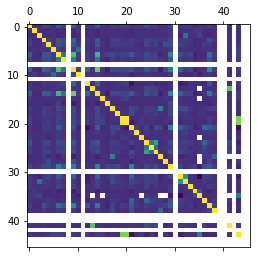

In [10]:
plt.matshow(cleaned_join1.corr())
plt.show()

In [11]:
# Correlation Matrix
corr = cleaned_join1.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\mosto\Anaconda3\envs\RTX-GPU\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


In [12]:
# Finding out highly correlated variables based on threshold

corr_matrix = cleaned_join1.corr().abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[('Multiple_HHUSA_Hire__c', 'Multiple_Hire_Review_Complete__c')]


In [13]:
# Create and fit selector
selector = SelectKBest(f_classif, k=5)
selector.fit(features_df, target)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = features_df.iloc[:,cols]

NameError: name 'features_df' is not defined

In [14]:
print(cleaned_join1.dtypes)

Alumni_Survey_Completed__c    float64
Anonymous_Donor__c              int64
Available_For_Urgents__c      float64
Bilingual__c                    int64
Client_Type__c                 object
                               ...   
Internship__c                 float64
Multiple_Hire__c              float64
Salary_Range__c               float64
Start_Date__c                 float64
Ops_Review_Date__c             object
Length: 70, dtype: object


In [15]:
def autoconvert_datetime(value):
    formats = ['%m/%d/%Y', '%m-%d-%y']  # formats to try
    result_format = '%d-%m-%Y'  # output format
    for dt_format in formats:
        try:
            dt_obj = datetime.strptime(value, dt_format)
            return dt_obj.strftime(result_format)
        except Exception as e:  # throws exception when format doesn't match
            pass
    return value  # let it be if it doesn't match

cleaned_join1['Ops_Review_Date__c'] = cleaned_join1['Ops_Review_Date__c'].apply(autoconvert_datetime)
cleaned_join1['CreatedDate'] = cleaned_join1['CreatedDate'].apply(autoconvert_datetime)

In [16]:
cleaned_join1['DURATION']= cleaned_join1['Ops_Review_Date__c']-cleaned_join1['CreatedDate']

In [18]:
dataTypeDict = dict(cleaned_join1.dtypes)
print(dataTypeDict)

{'Alumni_Survey_Completed__c': dtype('float64'), 'Anonymous_Donor__c': dtype('int64'), 'Available_For_Urgents__c': dtype('float64'), 'Bilingual__c': dtype('int64'), 'Client_Type__c': dtype('O'), 'DD214__c': dtype('O'), 'Desired_Earnings_Type__c': dtype('O'), 'Desired_Geographic_Region_of_Employment__c': dtype('O'), 'Desired_Industry_for_Employment__c': dtype('O'), 'Desired_Job_Function__c': dtype('O'), 'Desired_State_of_Employment__c': dtype('O'), 'Do_Not_Notify_Client__c': dtype('float64'), 'Do_Not_Text__c': dtype('int64'), 'Documents_Received__c': dtype('int64'), 'Employment_Barriers__c': dtype('O'), 'Enrolled_in_School__c': dtype('int64'), 'Federal_Hire__c': dtype('float64'), 'Finalized_HHUSA_revised_resume_on_file__c': dtype('int64'), 'Gender__c': dtype('O'), 'HasOptedOutOfEmail': dtype('int64'), 'HasOptedOutOfFax': dtype('int64'), 'HHUSA_Workshop_Participant__c': dtype('int64'), 'Highest_Level_of_Education_Completed__c': dtype('O'), 'Hired_with_EO_assistance__c': dtype('float64'),